In [2]:
import numpy as np, sympy as smp, matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D

plt.style.use(['science','notebook','grid', 'dark_background'])

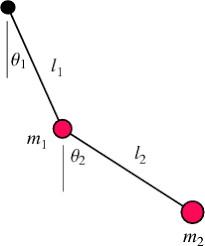

In [3]:
from IPython.display import Image
Image(filename = r'..\Images\d_pendulum.png', width = 500, height = 500)

In [4]:
t, g, m1, m2, l1, l2 = smp.symbols('t g m_1 m_2 l_1 l_2')
theta1, theta2 = smp.symbols(r'\theta_1, \theta_2', cls = smp.Function)

theta1 = theta1(t)
theta2 = theta2(t)

theta1_d = smp.diff(theta1, t)
theta2_d = smp.diff(theta2, t)
theta1_dd = smp.diff(theta1_d, t)
theta2_dd = smp.diff(theta2_d, t)

In [5]:
x1 = -l1 * smp.sin(theta1)
y1 = -l1 * smp.cos(theta1)
x2 = -l1 * smp.sin(theta1) - l2 * smp.sin(theta2)
y2 = -l1 * smp.cos(theta1) - l2 * smp.cos(theta2)

In [6]:
T1 = 1 / 2 * m1 * (smp.diff(x1, t) ** 2 + smp.diff(y1, t) ** 2)
T2 = 1 / 2 * m2 * (smp.diff(x2, t) ** 2 + smp.diff(y2, t) ** 2)
T = T1 + T2

V1 = m1 * g * y1
V2 = m2 * g * y2
V = V1 + V2

L = T - V

Lagrange's Equations: $$\frac{\partial L}{\partial \theta_1}-\frac{d}{dt}\frac{\partial L}{\partial \dot \theta_1}=0$$ $$\frac{\partial L}{\partial \theta_2}-\frac{d}{dt}\frac{\partial L}{\partial \dot \theta_2}=0$$

In [7]:
LE1 = (smp.diff(L, theta1) - smp.diff(smp.diff(L, theta1_d), t)).simplify()
LE2 = (smp.diff(L, theta2) - smp.diff(smp.diff(L, theta2_d), t)).simplify()

In [8]:
sols = smp.solve([LE1, LE2], (theta1_dd, theta2_dd), simplify = False, rational = False)
sols[theta1_dd]

-l_2*m_2*(g*sin(\theta_2(t)) - l_1*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)**2)*cos(\theta_1(t) - \theta_2(t))/(l_1*l_2*m_2*cos(\theta_1(t) - \theta_2(t))**2 - l_2*(l_1*m_1 + l_1*m_2)) - l_2*(-g*m_1*sin(\theta_1(t)) - g*m_2*sin(\theta_1(t)) - l_2*m_2*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), t)**2)/(l_1*l_2*m_2*cos(\theta_1(t) - \theta_2(t))**2 - l_2*(l_1*m_1 + l_1*m_2))

Define $z_1 = \dot \theta_1$ and $z_2 = \dot \theta_2$ so that $$\frac{dz_1}{dt}=\ddot \theta_1$$ $$\frac{dz_2}{dt}=\ddot \theta_2$$ 

In [9]:
dz1dt = smp.lambdify((t, g, m1, m2, l1, l2, theta1, theta2, theta1_d, theta2_d), sols[theta1_dd])
dz2dt = smp.lambdify((t, g, m1, m2, l1, l2, theta1, theta2, theta1_d, theta2_d), sols[theta2_dd])

dtheta1dt = smp.lambdify(theta1_d, theta1_d)
dtheta2dt = smp.lambdify(theta2_d, theta2_d)

In [10]:
def dSdt(S, t, g, m1, m2, l1, l2):
    theta1, z1, theta2, z2 = S
    return [
        dtheta1dt(z1),
        dz1dt(t, g, m1, m2, l1, l2, theta1, theta2, z1, z2),
        dtheta2dt(z2),
        dz2dt(t, g, m1, m2, l1, l2, theta1, theta2, z1, z2)
    ]

In [11]:
t = np.linspace(0, 40, 1001)

g = 9.807
m1 = 2
m2 = 1
l1 = 2
l2 = 1

ans = odeint(dSdt, y0 = [1, -3, -1, 5], t = t, args = (g, m1, m2, l1, l2)) 

In [12]:
theta1 = ans.T[0]
theta2 = ans.T[2]

In [13]:
def get_position(t, theta1, theta2, l1, l2):
    return (l1 * np.sin(theta1),
            -l1 * np.cos(theta1),
            l1 * np.sin(theta1) + l2 * np.sin(theta2),
            -l1 * np.cos(theta1) - l2 * np.cos(theta2))

x1, y1, x2, y2 = get_position(t, ans.T[0], ans.T[2], l1, l2)

In [ ]:
def animate(i):
    ln1.set_data([0, x1[i], x2[i]], [0, y1[i], y2[i]])

fig, ax = plt.subplots(1, 1, figsize = (8, 8))

ax.set_facecolor('k')
ax.set_title('Motion of Double Pendulum')

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')

ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

ln1, = plt.plot([], [], 'ro--', lw = 3, markersize = 8)
ln2, = ax.plot([], [], 'ro-', markersize = 8, alpha = 0.05, color = 'gold')
ln3, = ax.plot([], [], 'ro-', markersize = 8, alpha = 0.05, color = 'gold')

ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)

ani = animation.FuncAnimation(fig, animate, frames = 1000, interval = 50)
ani.save('..\Outputs\dbl_pendulum1.gif', writer = 'pillow', fps = 25)

# Finding Resonance Frequencies:

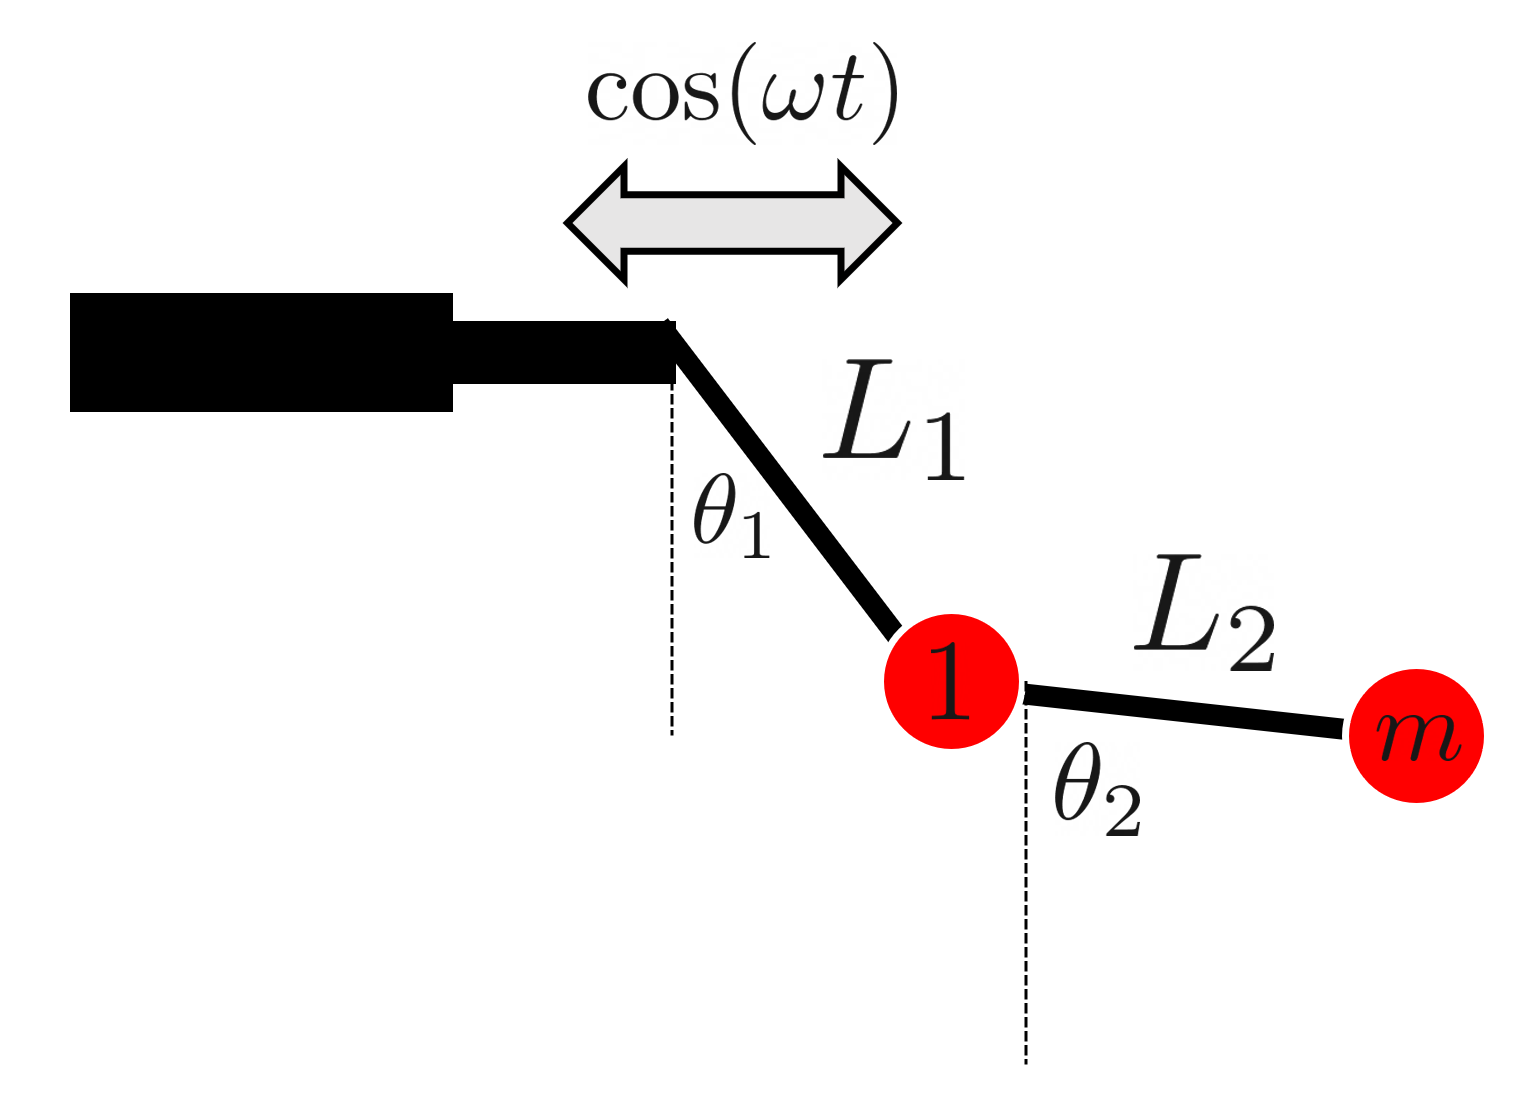

In [14]:
Image(filename = r'..\Images\motor.png', width = 500, height = 500)

To reduce the degrees of freedom, we've taken $m_1=1$, $L_1$ and $L_2$ as dimensionless.

In [15]:
t, m, g, L1, L2, w, C, alpha, beta = smp.symbols(r't m g L_1 L_2 \omega C \alpha \beta')
theta1, theta2 = smp.symbols(r'\theta_1 theta_2', cls = smp.Function)
x1, x2, y1, y2 = smp.symbols('x_1 x_2 y_1 y_2', cls=smp.Function)

theta1 = theta1(t)
theta2 = theta2(t)

theta1_d = smp.diff(theta1, t)
theta2_d = smp.diff(theta2, t)

theta1_dd = smp.diff(theta1_d, t)
theta2_dd = smp.diff(theta2_d, t)

In [16]:
x1 = x1(t, theta1)
y1 = y1(t, theta1)
x2 = x2(t, theta1, theta2)
y2 = y2(t, theta1, theta2)

x1 = smp.cos(w * t) + L1 * smp.sin(theta1)
y1 = -L1 * smp.cos(theta1)
x2 = smp.cos(w * t) + L1 * smp.sin(theta1) + L2 * smp.sin(theta2) 
y2 = -L1 * smp.cos(theta1) - L2 * smp.cos(theta2)

In [17]:
vx1_f = smp.lambdify((t, w, L1, L2, theta1, theta2, theta1_d, theta2_d), smp.diff(x1, t))
vy1_f = smp.lambdify((t, w, L1, L2, theta1, theta2, theta1_d, theta2_d), smp.diff(y1, t))
vx2_f = smp.lambdify((t, w, L1, L2, theta1, theta2, theta1_d, theta2_d), smp.diff(x2, t))
vy2_f = smp.lambdify((t, w, L1, L2, theta1, theta2, theta1_d, theta2_d), smp.diff(y2, t))

In [18]:
T1 = 1 / 2 * (smp.diff(x1, t) ** 2 + smp.diff(y1, t) ** 2)
T2 = 1 / 2 * m * (smp.diff(x2, t) ** 2 + smp.diff(y2, t) ** 2)
T = T1 + T2

V1 = g * y1
V2 = m * g * y2
V = V1 + V2

L = T - V

Lagrange's Equations: $$\frac{\partial L}{\partial \theta_1}-\frac{d}{dt}\frac{\partial L}{\partial \dot \theta_1}=0$$ $$\frac{\partial L}{\partial \theta_2}-\frac{d}{dt}\frac{\partial L}{\partial \dot \theta_2}=0$$

In [19]:
LE1 = (smp.diff(L, theta1) - smp.diff(smp.diff(L, theta1_d), t)).simplify()
LE2 = (smp.diff(L, theta2) - smp.diff(smp.diff(L, theta2_d), t)).simplify()

In [20]:
sols = smp.solve([LE1, LE2], (theta1_dd, theta2_dd), simplify = False, rational = False)
sols[theta2_dd]

L_1*(L_2*m*sin(\theta_1(t) - theta_2(t))*Derivative(theta_2(t), t)**2 - \omega**2*m*cos(\omega*t)*cos(\theta_1(t)) - \omega**2*cos(\omega*t)*cos(\theta_1(t)) + g*m*sin(\theta_1(t)) + g*sin(\theta_1(t)))*cos(\theta_1(t) - theta_2(t))/(-L_1*L_2*m*cos(\theta_1(t) - theta_2(t))**2 - L_2*(-L_1*m - L_1)) + (-L_1*m - L_1)*(-L_1*sin(\theta_1(t) - theta_2(t))*Derivative(\theta_1(t), t)**2 - \omega**2*cos(\omega*t)*cos(theta_2(t)) + g*sin(theta_2(t)))/(-L_1*L_2*m*cos(\theta_1(t) - theta_2(t))**2 - L_2*(-L_1*m - L_1))

For the sake of simplicity, assume that 
- $\theta_1$ and $\theta_2$ are eligible for small-angle approximations.
- $\theta_1(t)=C\cos(\omega t)$ and $\theta_2(t)=C \alpha\cos(\omega t)$

In [21]:
a = LE1.subs([(smp.sin(theta1 - theta2), theta1 - theta2), (smp.cos(theta1 - theta2), 1), (smp.cos(theta1), 1), (smp.sin(theta1), theta1),
              (theta1, C * smp.cos(w * t)), (theta2, C * alpha * smp.cos(w * t)), (m, 1), (L2, L1),]).doit().series(C, 0, 2).removeO().simplify()

b = LE2.subs([(smp.sin(theta1 - theta2), theta1 - theta2), (smp.cos(theta1 - theta2), 1), (smp.cos(theta1), 1), (smp.cos(theta2), 1), (smp.sin(theta1), theta1),
              (smp.sin(theta2), theta2), (theta1, C * smp.cos(w * t)), (theta2, C * alpha * smp.cos(w * t)), (m, 1), (L2, L1)]).doit().series(C, 0, 2).removeO().simplify()

$\beta=CL_1$

In [22]:
solution = smp.solve([a.args[1], b.args[2]], (w, alpha))
smp.limit(solution[0][0].subs(C, beta / L1).simplify(), beta, smp.oo)

-1.84775906502257*sqrt(g/L_1)

Defining the equations for odeint: $$\ddot \theta=\frac{d\xi}{dt}$$ $$\dot \theta=\xi$$ for each $\theta \in (\theta_1, \theta_2)$

In [23]:
dxi1dt = smp.lambdify((t, m, g, w, L1, L2, theta1, theta2, theta1_d, theta2_d), sols[theta1_dd])
dxi2dt = smp.lambdify((t, m, g, w, L1, L2, theta1, theta2, theta1_d, theta2_d), sols[theta2_dd])

dtheta1dt = smp.lambdify(theta1_d, theta1_d)
dtheta2dt = smp.lambdify(theta2_d, theta2_d)

In [24]:
def dSdt(S, t):
    theta1, xi1, theta2, xi2 = S
    return [
        dtheta1dt(xi1),
        dxi1dt(t, m, g, w, L1, L2, theta1, theta2, xi1, xi2),
        dtheta2dt(xi2),
        dxi2dt(t, m, g, w, L1, L2, theta1, theta2, xi1, xi2)
    ]

In [25]:
t = np.linspace(0, 20, 1000)

g = 9.807
m = 1

L1 = 20
L2 = 20

w = np.sqrt(g / L1)

ans = odeint(dSdt, y0 = [0, 0, 0, 0], t = t)

Text(0, 0.5, '$\\theta_1(t)$')

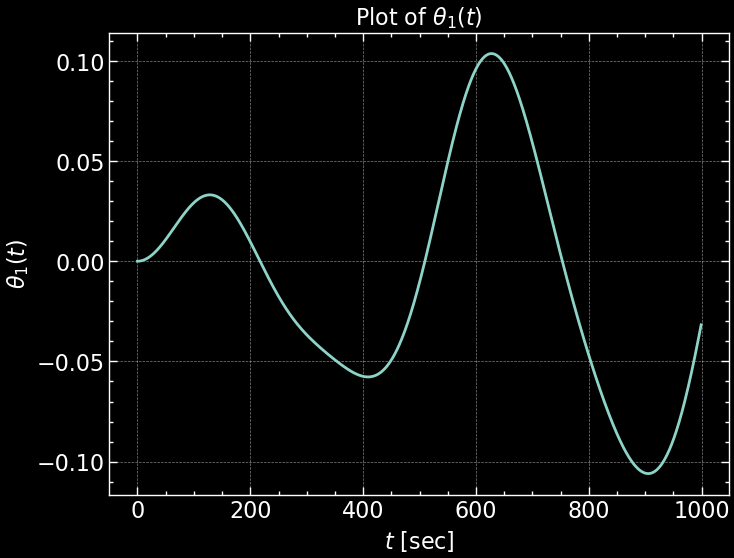

In [64]:
plt.plot(ans.T[0])
plt.title(r'Plot of $\theta_1(t)$')
plt.xlabel(r'$t$ [sec]')
plt.ylabel(r'$\theta_1(t)$')

Energies:

In [26]:
def energy(w):
    t = np.linspace(0, 100, 2000)
    ans = odeint(dSdt, y0 = [0.1, 0.1, 0, 0], t = t)
    
    vx1 = vx1_f(t, w, L1, L2, ans.T[0], ans.T[2], ans.T[1], ans.T[3])
    vx2 = vx1_f(t, w, L1, L2, ans.T[0], ans.T[2], ans.T[1], ans.T[3])
    vy1 = vx1_f(t, w, L1, L2, ans.T[0], ans.T[2], ans.T[1], ans.T[3])
    vy2 = vx1_f(t, w, L1, L2, ans.T[0], ans.T[2], ans.T[1], ans.T[3])
    return 0.5 * np.mean(vx1 ** 2 + vy1 ** 2 + vx2 ** 2 + vy2 ** 2)

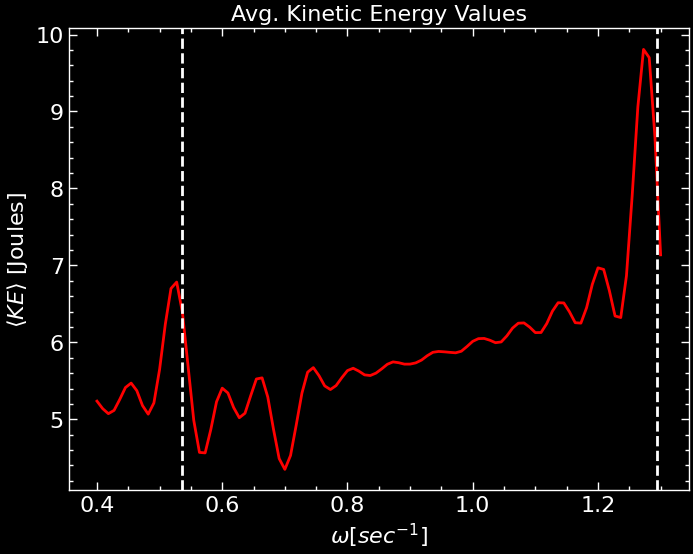

In [27]:
w_values = np.linspace(0.4, 1.3, 100)
E_values = np.vectorize(energy)(w_values)

plt.plot(w_values, E_values, color = 'red')
plt.axvline(1.84775 * np.sqrt(g / L1), c = 'w', ls = '--')
plt.axvline(0.76536 * np.sqrt(g / L1), c = 'w', ls = '--')

plt.title('Avg. Kinetic Energy Values')
plt.xlabel(r'$\omega [{sec}^{-1}]$')
plt.ylabel(r'$\langle KE \rangle$ [Joules]')
plt.grid()

The Dotted lines represent the Resonant Frequencies. We wanna solve for the particular value of $\omega$ that outputs the highest avg. KE.

In [28]:
def get_position(t, theta1, theta2, L1, L2):
    return (np.cos(w * t), 0 * t, np.cos(w * t) + L1 * np.sin(theta1), -L1 * np.cos(theta1), np.cos(w * t) + L1 * np.sin(theta1) + L2 * np.sin(theta2),
           -L1 * np.cos(theta1) - L2 * np.cos(theta2),)

x0, y0, x1, y1, x2, y2 = get_position(t, ans.T[0], ans.T[2], L1, L2)

In [29]:
t = np.linspace(0, 200, 20000)

g = 9.807
m = 1

L1 = 20
L2 = 20

w = w_values[w_values > 1][np.argmax(E_values[w_values > 1])]
ans = odeint(dSdt, y0 = [0.1, 0.1, 0, 0], t = t)


def get_x0y0x1y1x2y2(t, the1, the2, L1, L2):
    return (np.cos(w * t),
            0 * t,
            np.cos(w * t) + L1 * np.sin(the1),
            -L1 * np.cos(the1),
            np.cos(w * t) + L1 * np.sin(the1) + L2 * np.sin(the2),
            -L1 * np.cos(the1) - L2 * np.cos(the2),
            )

x0, y0, x1, y1, x2, y2 = get_x0y0x1y1x2y2(t, ans.T[0], ans.T[2], L1, L2)

In [ ]:
def animate(i):
    ln1.set_data([x0[::10][i], x1[::10][i], x2[::10][i]], [y0[::10][i], y1[::10][i], y2[::10][i]])
    
    trail1 = 50            
    trail2 = 50            
    
    ln2.set_data(x1[::10][i:max(1, i - trail1):-1], y1[::10][i:max(1, i - trail1):-1])   
    ln3.set_data(x2[::10][i:max(1, i - trail2):-1], y2[::10][i:max(1, i - trail2):-1])   

fig, ax = plt.subplots(1, 1, figsize = (8,8))

ax.set_facecolor('k')
ax.get_xaxis().set_ticks([])    
ax.get_yaxis().set_ticks([])

ln1, = plt.plot([], [], 'ro--', lw = 3, markersize = 8)
ln2, = ax.plot([], [], 'ro-', markersize = 8, alpha = 0.05, color = 'grey')  
ln3, = ax.plot([], [], 'ro-', markersize = 8, alpha = 0.05, color = 'grey')

ax.set_ylim(-44, 44)
ax.set_xlim(-44, 44)

ani = animation.FuncAnimation(fig, animate, frames = 2000, interval = 50)
ani.save('..\Outputs\dbl_pendulum2.gif', writer = 'pillow', fps = 25)

# The Double Pendulum in 3-D:

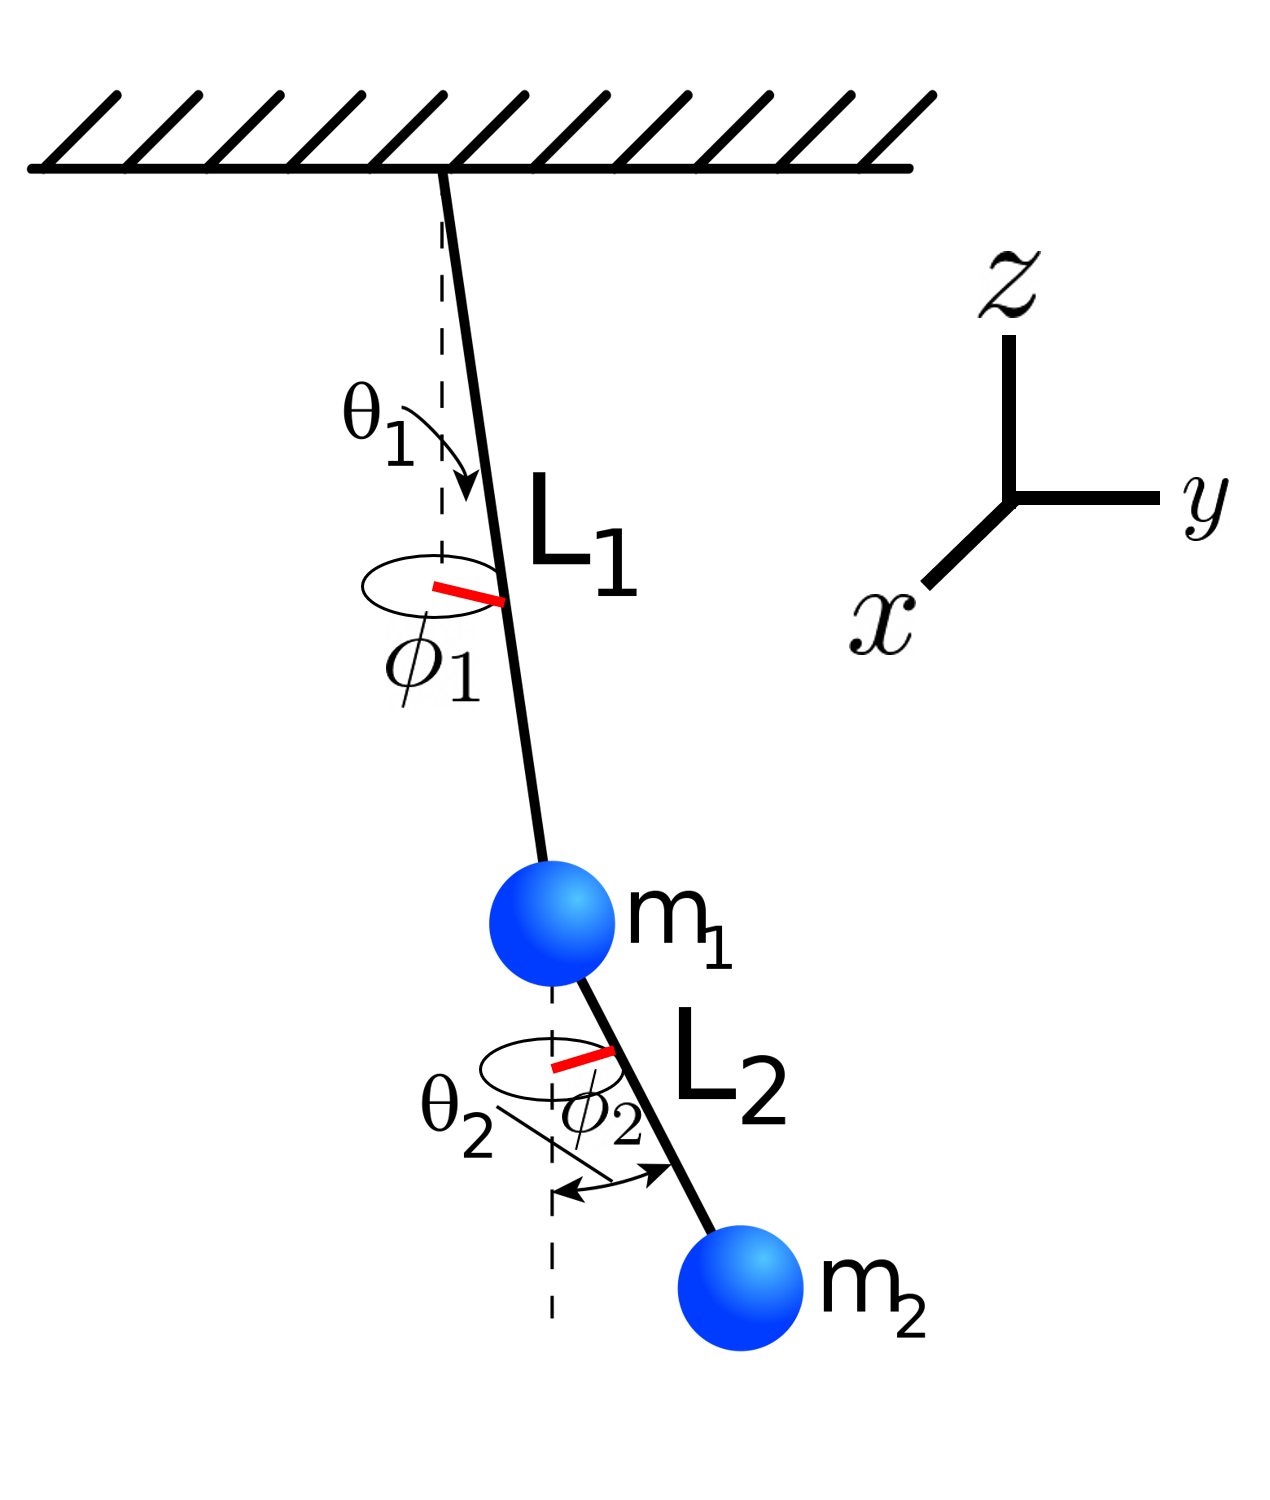

In [30]:
Image(filename = r'..\Images\doub_pen_3D.png', width = 500, height = 500)

In [31]:
t, g, m1, m2, L1, L2 = smp.symbols(r't g m_1 m_2 L_1 L_2')
theta1, theta2, phi1, phi2 = smp.symbols(r'\theta_1 \theta_2 \phi_1 \phi_2', cls = smp.Function)

theta1 = theta1(t)
theta2 = theta2(t)

phi1 = phi1(t)
phi2 = phi2(t)

theta1_d = smp.diff(theta1, t)
theta2_d = smp.diff(theta2, t)

phi1_d = smp.diff(phi1, t)
phi2_d = smp.diff(phi2, t)

theta1_dd = smp.diff(theta1_d, t)
theta2_dd = smp.diff(theta2_d, t)

phi1_dd = smp.diff(phi1_d, t)
phi2_dd = smp.diff(phi2_d, t)

In [32]:
x1 = L1 * smp.sin(theta1) * smp.cos(phi1)
y1 = L1 * smp.sin(theta1) * smp.sin(phi1)
z1 = -L1 * smp.cos(theta1)

x2 = x1 + L2 * smp.sin(theta2) * smp.cos(phi2)
y2 = y1 + L2 * smp.sin(theta2) * smp.sin(phi2)
z2 = z1 - L2 * smp.cos(theta2)

In [33]:
x1_f = smp.lambdify((theta1, theta2, phi1, phi2, L1, L2), x1)
y1_f = smp.lambdify((theta1, theta2, phi1, phi2, L1, L2), y1)
z1_f = smp.lambdify((theta1, theta2, phi1, phi2, L1, L2), z1)

x2_f = smp.lambdify((theta1, theta2, phi1, phi2, L1, L2), x2)
y2_f = smp.lambdify((theta1, theta2, phi1, phi2, L1, L2), y2)
z2_f = smp.lambdify((theta1, theta2, phi1, phi2, L1, L2), z2)

In [34]:
T1 = 1 / 2 * m1 * (smp.diff(x1, t) ** 2 + smp.diff(y1, t) ** 2 + smp.diff(z1, t) ** 2)
T2 = 1 / 2 * m2 * (smp.diff(x2, t) ** 2 + smp.diff(y2, t) ** 2 + smp.diff(z2, t) ** 2)
T = T1 + T2

V1 = m1 * g * z1
V2 = m2 * g * z2
V = V1 + V2

L = T - V

Lagrange's Equations: $$\frac{\partial L}{\partial \theta_1}-\frac{d}{dt}\frac{\partial L}{\partial \dot \theta_1}=0$$ $$\frac{\partial L}{\partial \theta_2}-\frac{d}{dt}\frac{\partial L}{\partial \dot \theta_2}=0$$ $$\frac{\partial L}{\partial \phi_1}-\frac{d}{dt}\frac{\partial L}{\partial \dot \phi_1}=0$$ $$\frac{\partial L}{\partial \phi_2}-\frac{d}{dt}\frac{\partial L}{\partial \dot \phi_2}=0$$

In [35]:
LE1 = smp.diff(L, theta1) - smp.diff(smp.diff(L, theta1_d), t)
LE2 = smp.diff(L, theta2) - smp.diff(smp.diff(L, theta2_d), t)
LE3 = smp.diff(L, phi1) - smp.diff(smp.diff(L, phi1_d), t)
LE4 = smp.diff(L, phi2) - smp.diff(smp.diff(L, phi2_d), t)

In [36]:
sols = smp.solve([LE1, LE2, LE3, LE4], (theta1_dd, theta2_dd, phi1_dd, phi2_dd), simplify = False, rational = False)

Defining the equations for odeint: 
$$\ddot \theta=\frac{d\omega}{dt}$$
$$\dot \theta=\omega$$
for each $\theta \in (\theta_1, \theta_2)$ 
$$\ddot \phi=\frac{d\Omega}{dt}$$ 
$$\dot \phi=\Omega$$
for each $\phi \in (\phi_1, \phi_2)$

In [37]:
domega1_dt = smp.lambdify((t, g, m1, m2, L1, L2, theta1, theta2, theta1_d, theta2_d, phi1, phi2, phi1_d, phi2_d), sols[theta1_dd])
domega2_dt = smp.lambdify((t, g, m1, m2, L1, L2, theta1, theta2, theta1_d, theta2_d, phi1, phi2, phi1_d, phi2_d), sols[theta2_dd])
dtheta1_dt = smp.lambdify(theta1_d, theta1_d)
dtheta2_dt = smp.lambdify(theta2_d, theta2_d)

dOmega1_dt = smp.lambdify((t, g, m1, m2, L1, L2, theta1, theta2, theta1_d, theta2_d, phi1, phi2, phi1_d, phi2_d), sols[phi1_dd])
dOmega2_dt = smp.lambdify((t, g, m1, m2, L1, L2, theta1, theta2, theta1_d, theta2_d, phi1, phi2, phi1_d, phi2_d), sols[phi2_dd])
dphi1_dt = smp.lambdify(phi1_d, phi1_d)
dphi2_dt = smp.lambdify(phi2_d, phi2_d)

Define $\vec S=(\theta_1, \theta_2, \phi_1, \phi_2, \omega_1, \omega_2, \Omega_1, \Omega_2)$.

In [38]:
def dSdt(S, t, g, m1, m2, L1, L2):
    theta1, theta2, phi1, phi2, omega1, omega2, Omega1, Omega2 = S
    return [
        dtheta1_dt(omega1),
        dtheta2_dt(omega2),
        dphi1_dt(Omega1),
        dphi2_dt(Omega2),
        domega1_dt(t, g, m1, m2, L1, L2, theta1, theta2, omega1, omega2, phi1, phi2, Omega1, Omega2),
        domega2_dt(t, g, m1, m2, L1, L2, theta1, theta2, omega1, omega2, phi1, phi2, Omega1, Omega2),
        dOmega1_dt(t, g, m1, m2, L1, L2, theta1, theta2, omega1, omega2, phi1, phi2, Omega1, Omega2),
        dOmega2_dt(t, g, m1, m2, L1, L2, theta1, theta2, omega1, omega2, phi1, phi2, Omega1, Omega2),
    ]

In [41]:
t = np.linspace(0, 40, 1001)

g = 9.807
m1 = 2
m2 = 1

L1 = 2
L2 = 1

ans = odeint(dSdt, y0 = [np.pi / 3, np.pi / 3, 0, -np.pi, 3, 4, -3, -4], t = t, args = (g, m1, m2, L1, L2))

In [ ]:
def get_position(theta1, theta2, phi1, phi2, L1, L2):
    return (x1_f(theta1, theta2, phi1, phi2, L1, L2),
            y1_f(theta1, theta2, phi1, phi2, L1, L2),
            z1_f(theta1, theta2, phi1, phi2, L1, L2),
            x2_f(theta1, theta2, phi1, phi2, L1, L2),
            y2_f(theta1, theta2, phi1, phi2, L1, L2),
            z2_f(theta1, theta2, phi1, phi2, L1, L2))

x1, y1, z1, x2, y2, z2 = get_position(ans.T[0], ans.T[1], ans.T[2], ans.T[3], L1, L2)
np.save('../Outputs/3Dpen_data', np.array([x1, y1, z1, x2, y2, z2]))

Animation:

Run the local file 'test.py' in terminal to execute the animation. Hold shift and click to interact.